In [23]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter
%matplotlib inline
import networkx as nx
import re

In [64]:
# Software versions used
import sys
import platform
import os
print("SOFTWARE VERSIONS:")
print("System: " + sys.platform + ", " + os.name)
print("Platform: " + platform.platform())
print("Python: " + sys.version)
print("Pandas: " + pd.__version__)
print("Matplotlib: " + matplotlib.__version__)
print("Seaborn: " + sns.__version__)
print("NLTK: " + nltk.__version__)

SOFTWARE VERSIONS:
System: linux, posix
Platform: Linux-5.3.0-7642-generic-x86_64-with-Ubuntu-19.10-eoan
Python: 3.7.5 (default, Nov 20 2019, 09:21:52) 
[GCC 9.2.1 20191008]
Pandas: 1.0.0
Matplotlib: 3.1.2
Seaborn: 0.10.0
NLTK: 3.4.5


In [65]:
# Example data of typical Corona-related disinformation accounts in this repository
for file in os.listdir():
    if file.endswith("xlsx"):
        print(file)

Ks47656475.xlsx
living_sweden.xlsx
mjau10303930.xlsx


In [66]:
# Read data
df = pd.read_excel("mjau10303930.xlsx")
#df.head()

In [67]:
# Make index from timestamp with proper formatting
pd.created_at = pd.to_datetime(df.time, 
                               format='%Y-%m%-%d%H:%M:%S')
df.index = pd.created_at
df.tail()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
time,,,,,,,,,,,,,,,,,,
2020-03-14 12:57:59,1238811612921892864,mjau10303930,RT @hanifbali: Det finns inget bevis att man f...,Sat Mar 14 12:57:59 +0000 2020,2020-03-14 12:57:59,NaN,NaN,NaN,NaN,1238808469660143616,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1238832971...,13,41,NaN,http://twitter.com/mjau10303930/statuses/12388...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2020-03-14 12:57:52,1238811584362958851,mjau10303930,RT @hanifbali: Sluta sprida myten att det är s...,Sat Mar 14 12:57:52 +0000 2020,2020-03-14 12:57:52,NaN,NaN,NaN,NaN,1238808469660143616,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1238832971...,13,41,NaN,http://twitter.com/mjau10303930/statuses/12388...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2020-03-14 12:57:44,1238811550854590468,mjau10303930,RT @hanifbali: Såg detta skulle hållas i Solna...,Sat Mar 14 12:57:44 +0000 2020,2020-03-14 12:57:44,NaN,NaN,NaN,NaN,1238808469660143616,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1238832971...,13,41,NaN,http://twitter.com/mjau10303930/statuses/12388...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2020-03-14 12:57:39,1238811529887322112,mjau10303930,RT @hanifbali: Vi bör agera nu. Be folk isoler...,Sat Mar 14 12:57:39 +0000 2020,2020-03-14 12:57:39,NaN,NaN,NaN,NaN,1238808469660143616,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1238832971...,13,41,NaN,http://twitter.com/mjau10303930/statuses/12388...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2020-03-14 12:57:39,1238811529887322112,mjau10303930,RT @hanifbali: Vi bör agera nu. Be folk isoler...,Sat Mar 14 12:57:39 +0000 2020,2020-03-14 12:57:39,NaN,NaN,NaN,NaN,1238808469660143616,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1238832971...,13,41,NaN,http://twitter.com/mjau10303930/statuses/12388...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


## Timeline 

This figure resamples the timestamps into day-for-day chunks to make it possible to plot the number of Twitter messages on a readable timeline.



Text(0, 0.5, 'Tweets')

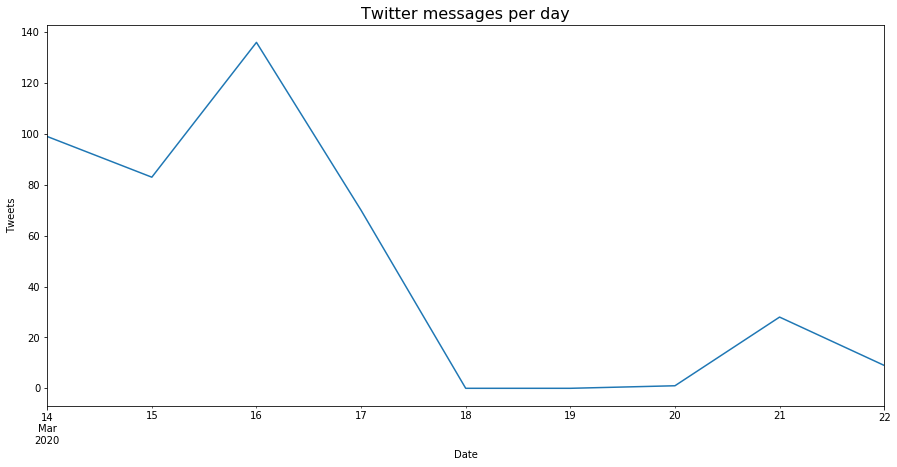

In [68]:
tweetsperday = df.resample('D').count()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)

plt.title('Twitter messages per day', size=16)

tweetsperday['id_str'].plot() #Plot each individual tweet per day

plt.xlabel('Date')
plt.ylabel('Tweets')

## 4. Word frequencies
Creates a word frequency chart by counting the most frequent words. This is a very simple method for detecting the main content of discussion. 

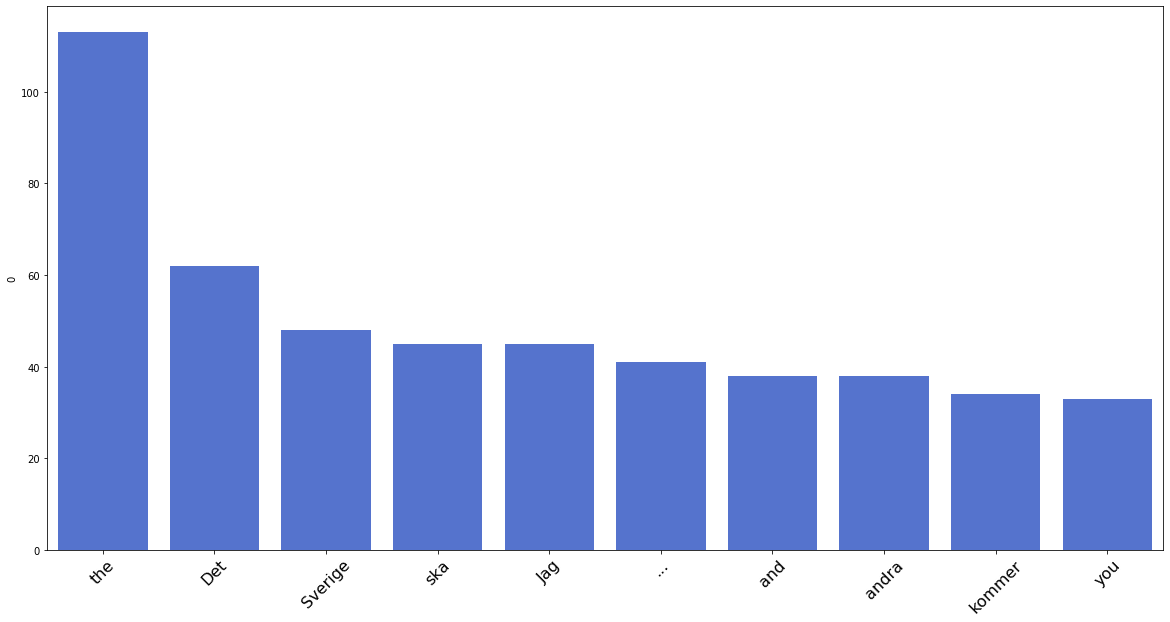

In [69]:
wordlist = []

# Extracts tokens minus Swedish stopwords
tokenlist = []
for d in df['text'].iteritems():
    #print(stopwords.words('swedish'))
    tknzr = TweetTokenizer()
    dtokenized = tknzr.tokenize(d[1])
    #print(dtokenized)
    for token in dtokenized:
        tokenlist.append(token)
             
for t in tokenlist:
    if t not in stopwords.words('swedish'):
        if len(t) > 2: #remove short special chars like :, ;, #
            if t.startswith('http'): #remove links
                continue
            if t.startswith('@'): #remove users
                continue
            #print(t[0] + "\t" + str(t[1]))
            wordlist.append(t)

word_freq = Counter(wordlist).most_common(10)

wordfreqdict = {}

for w in word_freq:
    wordfreqdict[w[0]] = w[1]

dfwords = pd.DataFrame.from_dict(wordfreqdict, orient="index")
dfwords = dfwords.sort_values(by=0, ascending=False)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

plot = sns.barplot(x=dfwords.index, y=dfwords[0], data=dfwords, color="royalblue")
for item in plot.get_xticklabels():
    item.set_rotation(45)
    item.set_fontsize(16)

## Mentions network
- which users are frequently mentioned.

In [70]:
G = nx.DiGraph()

In [71]:
mentioned_users = []

for tweet in df['text']:
    match = re.findall("(?<=@).*?(?=[\s|\:|\.])", tweet, re.IGNORECASE)
    if match:
        for m in match:
            mentioned_users.append(m)
            G.add_edge("Ks47656475", m)
    #nx.write_gexf(G, "filename.gexf")  # use this file for network analysis

In [72]:
for user in Counter(mentioned_users).most_common(20):
    print(user)

('hanifbali', 51)
('pwolodarski', 27)
('Jerlerup', 23)
('AgnesWold', 20)
('Folkhalsomynd', 19)
('Ivarpi', 18)
('ROGSAHL', 16)
('chrisforsne', 15)
('Bacchus38823823', 13)
('DrEkstrom', 12)
('akutdoktorn', 10)
('nntaleb', 8)
('bjan9', 7)
('DrEricDing', 7)
('WHO', 6)
('DanielFalush', 6)
('Nymne', 5)
('Gert54508411', 5)
('PontusPersson5', 5)
('DrTedros', 5)


## Retweets
- which accounts/users are often retweeted.

In [73]:
retweeted_accounts = []

In [74]:
for tweet in df['text']:
    match = re.findall("(?<=RT\s\@).*?(?=\:)", tweet, re.IGNORECASE)
    if match:
        retweeted_accounts.append(match[0])

#print(retweeted_accounts)       
for user in Counter(retweeted_accounts).most_common(20):
    print(user)

('hanifbali', 32)
('Jerlerup', 17)
('Ivarpi', 13)
('pwolodarski', 8)
('chrisforsne', 8)
('Bacchus38823823', 7)
('nntaleb', 7)
('DrEricDing', 7)
('WHO', 6)
('akutdoktorn', 6)
('ROGSAHL', 6)
('DanielFalush', 6)
('HansS01', 4)
('MagnusRanstorp', 4)
('Gert54508411', 4)
('bjornsing', 3)
('gorberg', 3)
('edyong209', 3)
('bjan9', 3)
('OiskaE', 2)
